In [1]:
from pykat import finesse
import matplotlib.pyplot as plt
%matplotlib inline

                                              ..-
    PyKat 1.0.18          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



--------------------------------------------------------------
Running kat - Started at 2017-05-26 15:48:26.456670

Finished in 0.246193 seconds


100% | ETA:  0:00:00 | Calculating                                             


------------------------------------------------------------------------
                     FINESSE pre-2.1.0    (build pre-2.1.0-225-g61a5d92)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        23.04.2016         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file C:\Users\Xu\AppData\Local\Temp\tmptql16e8c.kat,
  ~~ \)-'   '        Output file C:\Users\Xu\AppData\Local\Temp\tmptql16e8c.out,
     / |             Gnuplot file C:\Users\Xu\AppData\Local\Temp\tmptql16e8c.gnu 
    '  '                                        Fri May 26 15:48:26 2017
------------------------------------------------------------------------
 --- cavity tracing
 cavity cavity1:
  cavity is stable! Eigenvalues:
  q=0.05j, w0=130.131033750515um z=0m m=0
  finesse : 28557.3, round-trip power loss: 0.000219996 [/100]
  opt. length: 100mm, FSR: 2.99792458GHz
  FWHM: 104.97923300016kHz (pole: 52.4896165000801kHz)
  RT Gouy: 90 deg (mode s

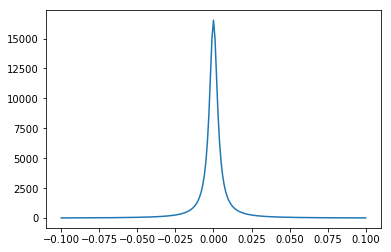

In [12]:
kat = finesse.kat()
kat.parseCommands('''
l i1 1 0 n1
s s0 1 n1 n3

m m1 0.9998 2e-4 0 n3 n4

s s_cav 0.05 n4 n5

m m2 0.99998 2e-5 90 n5 n6
attr m2 Rc 0.1

cav cavity1 m1 n4 m2 n5
maxtem 3
pd pow n4

xaxis m2 phi lin -0.1 0.1 200

trace 2
''')
out = kat.run()
plt.plot(out.x,out['pow'])
print(out.stdout)

--------------------------------------------------------------
Running kat - Started at 2017-05-26 15:48:30.984622

Finished in 0.133094 seconds

------------------------------------------------------------------------
                     FINESSE pre-2.1.0    (build pre-2.1.0-225-g61a5d92)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        23.04.2016         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file C:\Users\Xu\AppData\Local\Temp\tmp7f9fmnza.kat,
  ~~ \)-'   '        Output file C:\Users\Xu\AppData\Local\Temp\tmp7f9fmnza.out,
     / |             Gnuplot file C:\Users\Xu\AppData\Local\Temp\tmp7f9fmnza.gnu 
    '  '                                        Fri May 26 15:48:31 2017
------------------------------------------------------------------------
 --- cavity tracing
 cavity cavity1:
  cavity is stable! Eigenvalues:
  q=-0.0495+0.0499975j, w0=130.127780352666um z=-49.5000000000013mm m=-0.9998
  f

100% | ETA:  0:00:00 | Calculating                                             

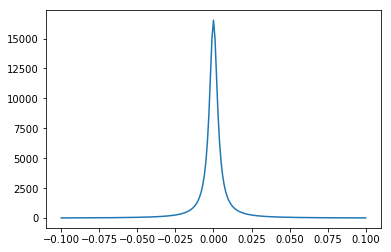

In [13]:
kat2 = kat.deepcopy()
kat2.parseCommands('''
attr m1 Rc -0.1''')
kat2.s_cav.L = 0.099
out2 = kat2.run()
plt.plot(out2.x,out2.y)
print(out2.stdout)